In [2]:
#!pip install networkx
#!pip install matplotlib

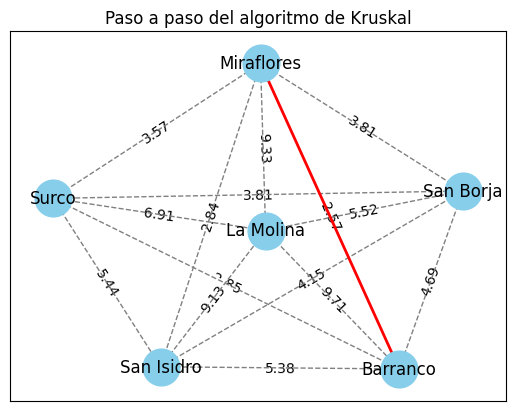

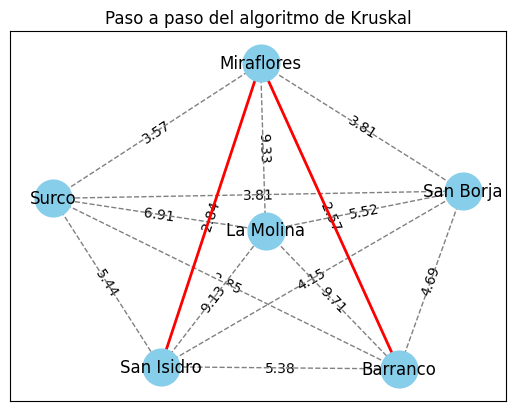

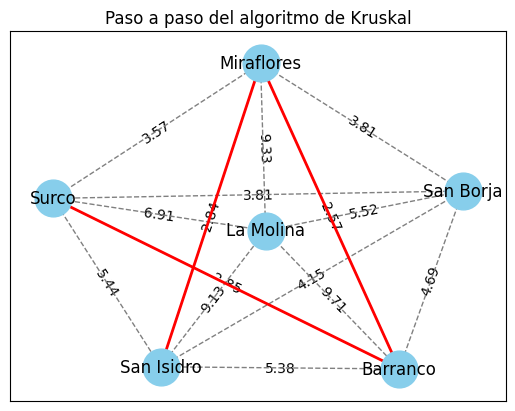

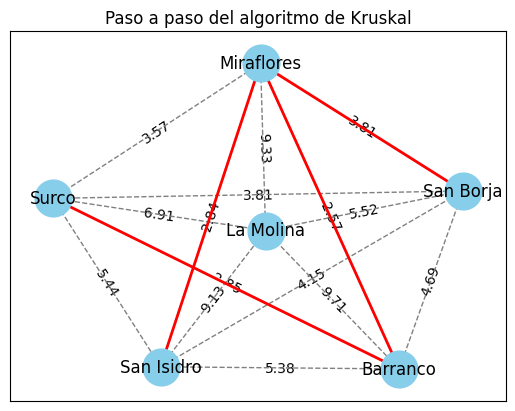

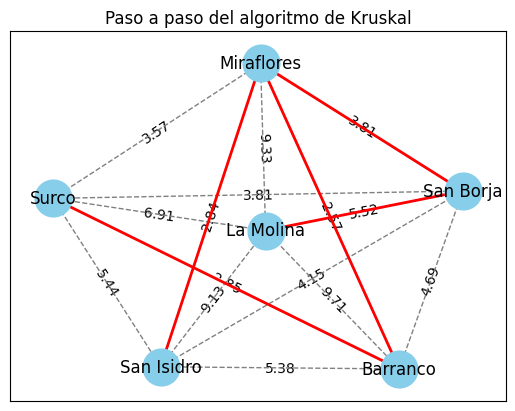

--------------------------------------------------------------


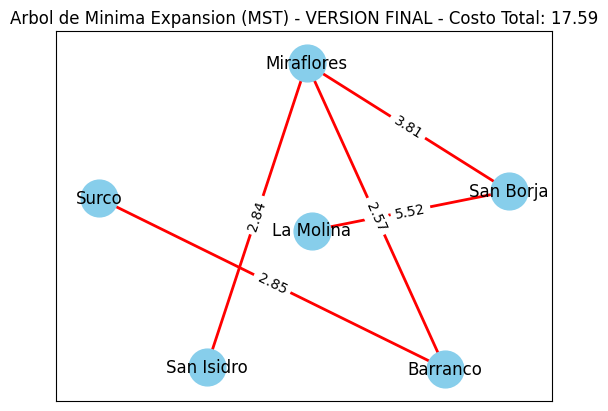

Costo total del Árbol de Mínima Expansión (AMV):  17.59


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def dibujar_grafo(grafo, posiciones, aristas_en_amv=None):
    nx.draw_networkx_nodes(grafo, posiciones, node_color='skyblue', node_size=700)
    nx.draw_networkx_labels(grafo, posiciones)
    nx.draw_networkx_edge_labels(grafo, posiciones, edge_labels=nx.get_edge_attributes(grafo, 'weight'))
    nx.draw_networkx_edges(grafo, posiciones, edge_color='gray', style='dashed')

    if aristas_en_amv:
        nx.draw_networkx_edges(grafo, posiciones, edgelist=aristas_en_amv, edge_color='red', width=2)

    plt.title("Paso a paso del algoritmo de Kruskal")
    plt.show()

def dibujar_grafo_final(grafo, posiciones, aristas_en_amv, costo_total):
    nx.draw_networkx_nodes(grafo, posiciones, node_color='skyblue', node_size=700)
    nx.draw_networkx_labels(grafo, posiciones)
    nx.draw_networkx_edges(grafo, posiciones, edgelist=aristas_en_amv, edge_color='red', width=2)
    nx.draw_networkx_edge_labels(grafo, posiciones, edge_labels={arista: grafo.edges[arista]['weight'] for arista in aristas_en_amv})
    plt.title(f"Arbol de Minima Expansion (MST) - VERSION FINAL - Costo Total: {costo_total}")
    plt.show()



def algoritmo_kruskal(grafo):
    aristas_ordenadas = sorted(grafo.edges(data=True), key=lambda x: x[2]['weight'])
    amv = nx.Graph()
    aristas_en_amv = []
    costo_total = 0
    posiciones = nx.spring_layout(grafo)




    padre = {nodo: nodo for nodo in grafo.nodes()}  
    rango = {nodo: 0 for nodo in grafo.nodes()} 


    def encontrar(nodo):
        if padre[nodo] != nodo:
            padre[nodo] = encontrar(padre[nodo])
        return padre[nodo]


    def unir(nodo1, nodo2):
        raiz1 = encontrar(nodo1)
        raiz2 = encontrar(nodo2)
        if raiz1 != raiz2:
            if rango[raiz1] > rango[raiz2]:
                padre[raiz2] = raiz1
            else:
                padre[raiz1] = raiz2
                if rango[raiz1] == rango[raiz2]:
                    rango[raiz2] += 1
            return True
        return False


    for arista in aristas_ordenadas:
        nodo1, nodo2, peso = arista
        if unir(nodo1, nodo2):
            amv.add_edge(nodo1, nodo2, weight=peso['weight'])
            aristas_en_amv.append((nodo1, nodo2))
            costo_total += peso['weight']
            dibujar_grafo(grafo, posiciones, aristas_en_amv)



    print("--------------------------------------------------------------")
    dibujar_grafo_final(amv, posiciones, aristas_en_amv, costo_total)
    return amv, costo_total



G = nx.Graph()
G.add_edges_from([
    ("Miraflores", "Surco", {'weight': 3.57}),
    ("Miraflores", "San Isidro", {'weight': 2.84}),
    ("Miraflores", "La Molina", {'weight': 9.33}),
    ("Miraflores", "Barranco", {'weight': 2.57}),
    ("Miraflores", "San Borja", {'weight': 3.81}),
    ("Surco", "San Borja", {'weight': 3.81}),
    ("Surco", "Barranco", {'weight': 2.85}),
    ("Surco", "La Molina", {'weight': 6.91}),
    ("Surco", "San Isidro", {'weight': 5.44}),
    ("San Isidro", "La Molina", {'weight': 9.13}),
    ("San Isidro", "San Borja", {'weight': 4.15}),
    ("San Isidro", "Barranco", {'weight': 5.38}),
    ("La Molina", "San Borja", {'weight': 5.52}),
    ("La Molina", "Barranco", {'weight': 9.71}),
    ("Barranco", "San Borja", {'weight': 4.69})
])

amv_final, costo_total = algoritmo_kruskal(G)
print("Costo total del Árbol de Mínima Expansión (AMV): ", costo_total)